In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. load the data

In [2]:
train_data = pd.read_csv('labeledTrainData.tsv', header = 0, delimiter = "\t")
print(train_data.shape)
train_data.head()

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


### 2. EDA

- 1. 데이터 크기
- 2. 각 리뷰의 문자 길이 분포
- 3. 많이 사용된 단어
- 4. 극정, 부정 데이터의 분포
- 5. 각 리뷰의 단어 개수 분포


#### 2-1. 데이터 크기

In [3]:
train_size = len(train_data)
train_size

25000

#### 2-2. 리뷰의 문자 길이와 분포

- '최대값', '최소값', '평균값', '표준편차', '중간값', '1사분위', '3사분위'

In [4]:
train_len = train_data['review'].apply(len)
train_len.head()

0    2302
1     946
2    2449
3    2245
4    2231
Name: review, dtype: int64

In [5]:
def EDA(df):
    print("Maximum:", np.max(df))
    print("Minimum:", np.min(df))
    print("Average:", round(np.mean(df),2))
    print("Std.Dev:", round(np.std(df),2))
    print("Median:", round(np.median(df),2))
    print("1Q:", np.percentile(df, 25))
    print("3Q:", np.percentile(df, 75))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
    ax1.hist(df, bins = 200)
    ax1.set_xlabel('length of review')
    ax1.set_ylabel('number of review')

    ax2.boxplot(df, labels = ['review counts'])
    plt.show()

Maximum: 13708
Minimum: 52
Average: 1327.71
Std.Dev: 1005.22
Median: 981.0
1Q: 703.0
3Q: 1617.0


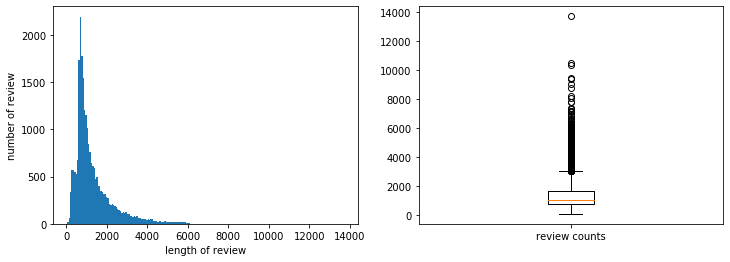

In [6]:
EDA(train_len)

#### 2-3. 많이 사용한 단어
- using WordCloud
- br, which is a HTML tag, it needs to be cleaned by removing all tags

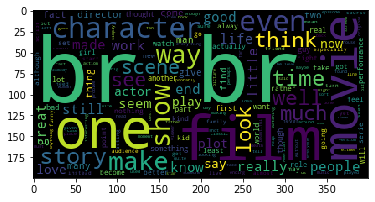

In [7]:
from wordcloud import WordCloud
cloud = WordCloud().generate("".join(train_data['review']))
plt.imshow(cloud)

In [8]:
balance = train_data['sentiment'].value_counts()
balance

1    12500
0    12500
Name: sentiment, dtype: int64

#### 2-4. 리뷰별 단어 개수 분포

In [9]:
train_word_cnt = train_data['review'].apply(lambda x:len(x.split(' ')))
train_word_cnt.head()

0    433
1    158
2    378
3    379
4    367
Name: review, dtype: int64

Maximum: 2470
Minimum: 10
Average: 233.79
Std.Dev: 173.74
Median: 174.0
1Q: 127.0
3Q: 284.0


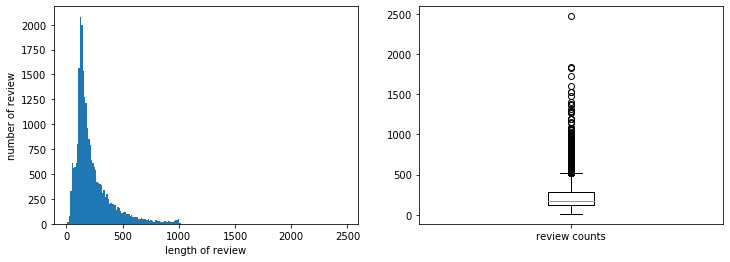

In [10]:
EDA(train_word_cnt)

### 3. Data Preprocessing
- HTML 태그
- 특수 문자

In [11]:
train_data.review[0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

#### 3-1. HTML 태그 제거
- Using BeautifulSoup

In [12]:
from bs4 import BeautifulSoup
html_cut = BeautifulSoup(train_data.review[0], "html5lib").get_text()
html_cut

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

#### 3-2. 숫자 및 특수기호를 공백으로 대체

In [13]:
import re
text_only = re.sub("[^a-zA-Z]"," ", html_cut)
text_only

'With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

#### 3-3. Stopword 제거

In [14]:
import nltk
# nltk.download('stopwords')

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# 소문자 변환
text_only = text_only.lower()
words = text_only.split()
words = [i for i in words if not i in stop_words]
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [16]:
clean_review = ' '.join(words)
clean_review

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [17]:
def preprocessing(review):
    html_cut = BeautifulSoup(review, "html5lib").get_text()
    text_only = re.sub("[^a-zA-Z]"," ", html_cut)
    stop_words = set(stopwords.words('english'))
    text_only = text_only.lower()
    words = text_only.split()
    words = [i for i in words if not i in stop_words]
    clean_review = ' '.join(words)
    return clean_review

In [18]:
train_review_lst = []
for i in train_data['review']:
    train_review_lst.append(preprocessing(i))
train_review_lst[:1]

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

In [19]:
clean_train_df = pd.DataFrame({'review':train_review_lst, 'sentiments':train_data['sentiment']})
print(clean_train_df.shape)
clean_train_df.head()

(25000, 2)


,review,sentiments
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


#### 3-4. Tokenizer
- 모델에 따라 입력값이 텍스트가 아닌 각 단어의 인덱스로 되어야 하고, 동일한 길이여야 하기 때문에
- Tokenizer 후 , 인덱스로 구성된 벡터로 변환

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words = 6000)
token.fit_on_texts(train_review_lst)
train_text_sequence = token.texts_to_sequences(train_review_lst)
print("first row size:",len(train_text_sequence[0]),'\n\nits element:\n', train_text_sequence[0])

first row size: 188 

its element:
 [404, 70, 419, 506, 2456, 115, 54, 873, 516, 178, 178, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 418, 70, 637, 69, 237, 94, 541, 120, 1, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 3315, 1501, 574, 734, 923, 822, 1239, 1408, 360, 221, 15, 576, 2274, 734, 27, 340, 16, 41, 1500, 388, 165, 3962, 115, 627, 499, 79, 4, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 3, 507, 62, 25, 16, 640, 133, 231, 95, 600, 3439, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12, 549, 386, 717, 12, 41, 16, 158, 362, 4392, 3388, 41, 87, 225, 438, 207, 254, 117, 3, 316, 1356]


- 2 이상

In [21]:
for i in range(len(train_text_sequence)):
    train_text_sequence[i] = [j for j in train_text_sequence[i] if j > 2]
print("first row size:",len(train_text_sequence[0]),'\n\nits element:\n', train_text_sequence[0])

first row size: 183 

its element:
 [404, 70, 419, 506, 2456, 115, 54, 873, 516, 178, 178, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 71, 4826, 71, 635, 253, 70, 11, 302, 1663, 486, 1144, 3265, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 418, 70, 637, 69, 237, 94, 541, 120, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 116, 291, 382, 121, 3315, 1501, 574, 734, 923, 822, 1239, 1408, 360, 221, 15, 576, 2274, 734, 27, 340, 16, 41, 1500, 388, 165, 3962, 115, 627, 499, 79, 4, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 16, 4, 3, 507, 62, 25, 16, 640, 133, 231, 95, 600, 3439, 1864, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12, 549, 386, 717, 12, 41, 16, 158, 362, 4392, 3388, 41, 87, 225, 438, 207, 254, 117, 3, 316, 1356]


#### 3-5. 어휘 사전 불러오기 (인덱스 맵핑)

In [22]:
vocab = token.word_index
print("Total Word Dictionary",len(vocab))
print("ex) vocab index:",vocab['movie'])

Total Word Dictionary 74065
ex) vocab index: 1


In [23]:
word_dict = {}
word_dict['vocab'] = vocab
word_dict['vocab_size'] = len(vocab)+1

#### 3-6. 단어 길이 맞추면서 훈련 데이터 셋팅

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 174 #since median = 174 (avg = 일부 이상치 데이터로 인해 평균이 급격히 올라갔기 때문)
train_input = pad_sequences(train_text_sequence, maxlen = maxlen, padding = 'post')
train_input.shape
train_input[:10]

array([[ 178,  178,  165, ...,    3,  316, 1356],
       [ 232,  203, 3048, ...,    0,    0,    0],
       [ 382, 2818, 4393, ..., 1175, 5310,    0],
       ...,
       [ 178,  248,  318, ...,    0,    0,    0],
       [ 318, 1739, 1089, ...,    0,    0,    0],
       [ 244, 1921,    4, ...,    0,    0,    0]], dtype=int32)

- y_train

In [25]:
train_label = np.array(train_data['sentiment'])
print(train_label.shape)
train_label[:10]

(25000,)


array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1])

#### 3-6. test data 전처리

In [26]:
test_data = pd.read_csv('TestData.tsv', header = 0, delimiter = "\t")
print(test_data.shape)
test_data.head()

(25000, 2)


,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


#### _데이터 클린징 (html, 특수기호, stopwords, 소문자)_

In [27]:
test_review_lst = []
for i in test_data['review']:
    test_review_lst.append(preprocessing(i))
clean_test_df = pd.DataFrame({'review':test_review_lst, 'id':test_data['id']})
print(clean_test_df.shape)
clean_test_df.head()

(25000, 2)


,review,id
0,naturally film main themes mortality nostalgia...,12311_10
1,movie disaster within disaster film full great...,8348_2
2,movie kids saw tonight child loved one point k...,5828_4
3,afraid dark left impression several different ...,7186_2
4,accurate depiction small time mob life filmed ...,12128_7


#### _test_id 리스트_

In [28]:
test_id = np.array(test_data['id'])
print(test_id.shape)
test_id[:10]

(25000,)


array(['12311_10', '8348_2', '5828_4', '7186_2', '12128_7', '2913_8',
       '4396_1', '395_2', '10616_1', '9074_9'], dtype=object)

####  _tokenizer()_

In [29]:
token.fit_on_texts(test_review_lst)
test_text_sequences = token.texts_to_sequences(test_review_lst)
print("first row size:",len(test_text_sequences[0]),'\n\nits element:\n', test_text_sequences[0])

first row size: 62 

its element:
 [1745, 2, 167, 1248, 4213, 1756, 2787, 264, 1583, 1040, 410, 816, 660, 965, 530, 87, 2, 135, 237, 900, 5388, 1718, 25, 244, 1660, 1344, 5158, 1154, 619, 243, 1560, 38, 1261, 3728, 38, 969, 5006, 38, 434, 38, 2561, 1745, 216, 9, 2, 1432, 20, 2295, 279, 5084, 3811, 276, 1187, 4321, 66, 5298, 961, 250, 767, 3821, 4250, 762]


#### _2 이상_

In [30]:
for i in range(len(test_text_sequences)):
    test_text_sequences[i] = [j for j in test_text_sequences[i] if j > 2]
print("first row size:",len(test_text_sequences[0]),'\n\nits element:\n', test_text_sequences[0])

first row size: 59 

its element:
 [1745, 167, 1248, 4213, 1756, 2787, 264, 1583, 1040, 410, 816, 660, 965, 530, 87, 135, 237, 900, 5388, 1718, 25, 244, 1660, 1344, 5158, 1154, 619, 243, 1560, 38, 1261, 3728, 38, 969, 5006, 38, 434, 38, 2561, 1745, 216, 9, 1432, 20, 2295, 279, 5084, 3811, 276, 1187, 4321, 66, 5298, 961, 250, 767, 3821, 4250, 762]


#### _단어 길이 174_

In [31]:
text_inputs = pad_sequences(test_text_sequences, maxlen = maxlen, padding = 'post')
print(text_inputs.shape)
text_inputs[:10]

(25000, 174)


array([[1745,  167, 1248, ...,    0,    0,    0],
       [1408,  604, 1408, ...,    0,    0,    0],
       [ 229,  104, 4089, ...,    0,    0,    0],
       ...,
       [   3,   24,  177, ...,    0,    0,    0],
       [ 137,   32,   58, ...,    0,    0,    0],
       [ 563, 2707, 1299, ...,    0,    0,    0]], dtype=int32)

### 5. 데이터

In [32]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(train_input, train_label, test_size = 0.1)
x_train_all.shape, x_test.shape, y_train_all.shape, y_test.shape

((22500, 174), (2500, 174), (22500,), (2500,))

#### _검증세트_

In [33]:
np.random.seed(42)
random_index = np.random.permutation(22500)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((20000, 174), (2500, 174), (20000,), (2500,))

#### one-hot encoding

In [34]:
# from tensorflow.keras.utils import to_categorical
# x_train_onehot = to_categorical(x_train)
# x_val_onehot = to_categorical(x_val)
# x_train_onehot.shape, x_val_onehot.shape

### 6. 모델링

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Dropout, LSTM

#### _모델링 & 컴파일 & 훈련_

In [36]:
model = Sequential()
model.add(Embedding(6000,174))
model.add(LSTM(32))
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 174)         1044000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                26496     
_________________________________________________________________
dense (Dense)                (None, 20)                660       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
________________________________________________________

In [37]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, 
                    validation_data = (x_val, y_val))

Train on 20000 samples, validate on 2500 samples
Epoch 1/20
20000/20000 [==============================] - 82s 4ms/sample - loss: 0.6872 - acc: 0.5242 - val_loss: 0.5998 - val_acc: 0.7712
Epoch 2/20
20000/20000 [==============================] - 81s 4ms/sample - loss: 0.5788 - acc: 0.7271 - val_loss: 0.5697 - val_acc: 0.7120
Epoch 3/20
20000/20000 [==============================] - 80s 4ms/sample - loss: 0.5851 - acc: 0.7013 - val_loss: 0.6041 - val_acc: 0.6916
Epoch 4/20
20000/20000 [==============================] - 79s 4ms/sample - loss: 0.5666 - acc: 0.7191 - val_loss: 0.5499 - val_acc: 0.7032
Epoch 5/20
20000/20000 [==============================] - 78s 4ms/sample - loss: 0.5577 - acc: 0.7143 - val_loss: 0.6296 - val_acc: 0.6052
Epoch 6/20
20000/20000 [==============================] - 81s 4ms/sample - loss: 0.6234 - acc: 0.6258 - val_loss: 0.6323 - val_acc: 0.5996
Epoch 7/20
20000/20000 [==============================] - 82s 4ms/sample - loss: 0.6206 - acc: 0.6259 - val_loss: 0.6

#### _훈련, 검증 세트에 대한 손실 그래프와 정확도 그래프_

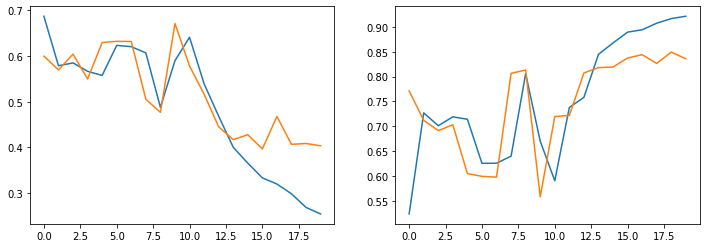

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
plt.show()

#### _검증 세트 정확도 평가_

In [39]:
loss, acc = model.evaluate(x_val, y_val, verbose = 0)
acc

0.8356